In [1]:
!pip install modelscope --upgrade


  Using cached modelscope-1.32.0-py3-none-any.whl.metadata (43 kB)
Using cached modelscope-1.32.0-py3-none-any.whl (6.0 MB)
  Attempting uninstall: modelscope
    Found existing installation: modelscope 1.9.5
    Uninstalling modelscope-1.9.5:
      Successfully uninstalled modelscope-1.9.5


In [2]:
!pip install modelscope==1.9.5
!pip install addict
!pip install opencv-python matplotlib


  Using cached modelscope-1.9.5-py3-none-any.whl.metadata (33 kB)
Using cached modelscope-1.9.5-py3-none-any.whl (5.4 MB)
  Attempting uninstall: modelscope
    Found existing installation: modelscope 1.32.0
    Uninstalling modelscope-1.32.0:
      Successfully uninstalled modelscope-1.32.0


In [3]:
!pip install einops
!pip install opencv-python
!pip install matplotlib
!pip install timm
!pip install huggingface_hub


In [4]:
!git clone https://github.com/piddnad/DDColor.git


fatal: destination path 'DDColor' already exists and is not an empty directory.


In [5]:
!mkdir -p /content/DDColor/weights


In [6]:
!ls /content/DDColor/weights


ddcolor.pth


In [7]:
from modelscope.hub.snapshot_download import snapshot_download

model_dir = snapshot_download('damo/cv_ddcolor_image-colorization', cache_dir='./modelscope')
print('model assets saved to %s' % model_dir)

2025-12-04 06:43:34,198 - modelscope - INFO - PyTorch version 2.9.0+cu126 Found.
2025-12-04 06:43:34,204 - modelscope - INFO - TensorFlow version 2.19.0 Found.
2025-12-04 06:43:34,205 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2025-12-04 06:43:34,207 - modelscope - INFO - No valid ast index found from /root/.cache/modelscope/ast_indexer, generating ast index from prebuilt!
2025-12-04 06:43:34,286 - modelscope - INFO - Loading done! Current index file version is 1.9.5, with md5 a793e1baf94b976dc3e8b1256c019832 and a total number of 945 components indexed
2025-12-04 06:43:36,193 - modelscope - WARNING - Model revision not specified, use revision: v1.02


model assets saved to ./modelscope/damo/cv_ddcolor_image-colorization


In [9]:
colorizer = pipeline(
    task=Tasks.image_colorization,
    model='damo/cv_ddcolor_image-colorization',
    device='cuda:0'   # gunakan string bukan integer
)


2025-12-04 06:46:00,271 - modelscope - WARNING - Model revision not specified, use revision: v1.02
2025-12-04 06:46:00,609 - modelscope - INFO - initiate model from /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization
2025-12-04 06:46:00,610 - modelscope - INFO - initiate model from location /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization.
2025-12-04 06:46:00,615 - modelscope - INFO - initialize model from /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization
2025-12-04 06:46:15,624 - modelscope - INFO - Loading DDColor model from /root/.cache/modelscope/hub/damo/cv_ddcolor_image-colorization/pytorch_model.pt, with param key: [params].
2025-12-04 06:46:16,517 - modelscope - INFO - load model done.
2025-12-04 06:46:16,534 - modelscope - WARNING - No preprocessor field found in cfg.
2025-12-04 06:46:16,535 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2025-12-04 06:46:16,536 - modelscope - WARNI

In [13]:
from google.colab import files
import cv2

uploaded = files.upload()  # Upload file BW
img_path = list(uploaded.keys())[0]

# Baca gambar dan ubah ke format RGB
gray_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)


Saving citra.jpg to citra (1).jpg


In [17]:
result = colorizer(gray_img)


In [29]:
if isinstance(result, dict):
    color_img = result.get('output') or result.get('img') or list(result.values())[0]
else:
    color_img = result

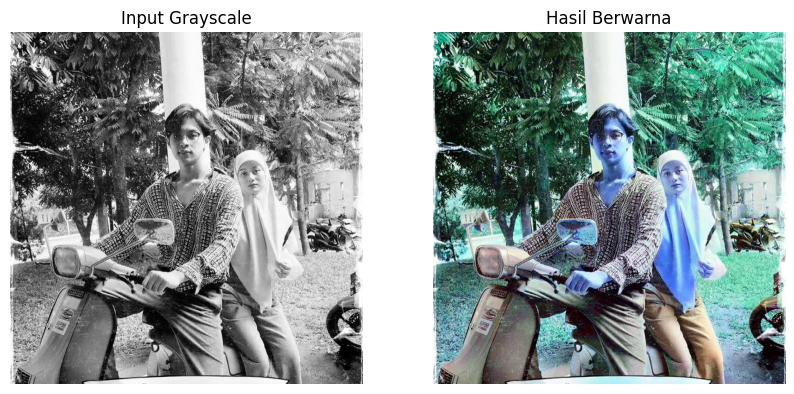

In [35]:
import matplotlib.pyplot as plt

# Cek tipe result
if isinstance(result, dict):
    if 'output' in result:
        color_img = result['output']
    elif 'img' in result:
        color_img = result['img']
    else:
        color_img = list(result.values())[0]  # fallback
else:
    color_img = result  # langsung ndarray

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_img)
plt.title('Input Grayscale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(color_img)
plt.title('Hasil Berwarna')
plt.axis('off')
plt.show()
